In [1]:
import os, cv2, multiprocessing, parmap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from multiprocessing import freeze_support
from utils.dataset import load_dataset

In [2]:
num_cores = multiprocessing.cpu_count()

In [3]:
img_root_path = '.' + os.sep + 'crane_planer_img'
img_path_list = os.listdir(img_root_path)

for i, img_path in enumerate(img_path_list):
    img_path_list[i] = img_root_path + os.sep + img_path
    
len(img_path_list)

14802

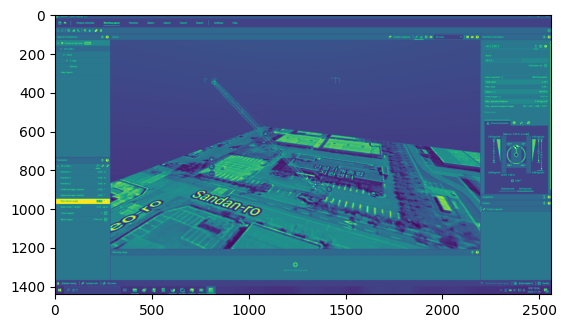

In [4]:
img = cv2.imread(img_path_list[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [5]:
freeze_support()
split_data = np.array_split(img_path_list, num_cores)

for i, x in enumerate(split_data):
    split_data[i] = x.tolist()

In [ ]:
result = parmap.map(load_dataset, split_data, pm_pbar=True, pm_processes=num_cores)

  0%|          | 0/16 [00:00<?, ?it/s]

In [7]:
data_set = pd.DataFrame()
    
for x in result:
    data_set = pd.concat([data_set, x])

data_set.describe()

NameError: name 'result' is not defined

In [9]:
data_set

,swing_angle(deg),boom_angle(deg),weight(ton),fl_pressure(kg/cm^2),fr_pressure(kg/cm^2),rl_pressure(kg/cm^2),rr_pressure(kg/cm^2),left_pressure_length(m),right_pressure_length(m)
0,0.0,40.0,1.0,3.79,3.79,0.0,0.0,3.92,3.92
0,0.0,41.0,1.0,3.64,3.64,0.0,0.0,4.08,4.08
0,0.0,42.0,1.0,3.49,3.49,0.0,0.0,4.25,4.25
0,0.0,43.0,1.0,3.36,3.36,0.0,0.0,4.42,4.42
0,0.0,44.0,1.0,3.23,3.23,0.0,0.0,4.60,4.40
0,0.0,45.0,1.0,3.11,3.11,0.0,0.0,4.78,4.78
0,0.0,46.0,1.0,2.99,2.99,0.0,0.0,4.96,4.96
0,0.0,47.0,1.0,2.89,2.89,0.0,0.0,5.14,5.40
0,0.0,48.0,1.0,2.78,2.78,0.0,0.0,5.33,5.33
